In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
o_img=cv2.imread('../Images/joker.jpg') # Reads in BGR format
o_img=cv2.cvtColor(o_img,cv2.COLOR_BGR2RGB)
print(o_img.shape)

(720, 1280, 3)


In [3]:
def drawImage(img,title=""):
    plt.axis(False)
    plt.title(title)
    plt.imshow(img)
    plt.show()

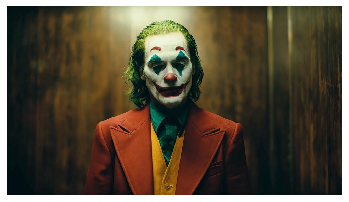

In [4]:
drawImage(o_img)
img=o_img.copy()
pixels=np.reshape(img,(-1,3))

In [5]:
def K_Means(n_colors):
    k_means=KMeans(n_clusters=n_colors,random_state=2)
    k_means=k_means.fit(pixels)
    return k_means

In [6]:
def segmented_image(k_means):
    centers=k_means.cluster_centers_.astype('uint8')
    labels=np.array(np.unique(k_means.labels_,return_counts=True))
    label_percent=labels[1]/pixels.shape[0]

    assigned_colors=[[label_percent[i],centers[i]] for i in range(len(centers))]
    assigned_colors=sorted(assigned_colors,reverse=True)

    color_swatches=np.zeros((10,100,3)).astype(int)
    start=0;
    for i in range(len(centers)):
        width=int(color_swatches.shape[1]*assigned_colors[i][0])
        end=start+width
        color_swatches[:,start:end,:]=assigned_colors[i][1]
        start=end

    for i in range(pixels.shape[0]):
        pixels[i]=centers[k_means.labels_[i]]

    seg_img = np.reshape(pixels, (img.shape[0], img.shape[1], 3))

    return color_swatches,seg_img

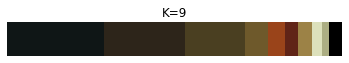

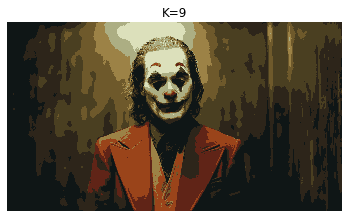

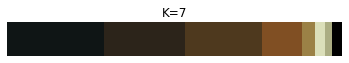

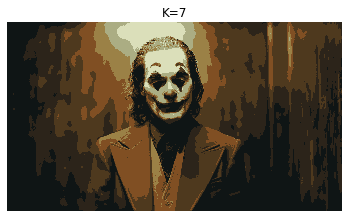

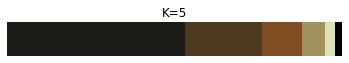

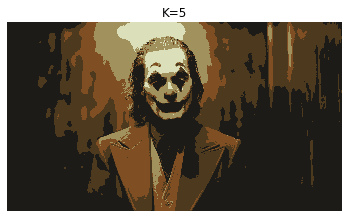

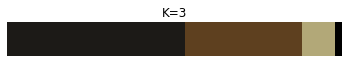

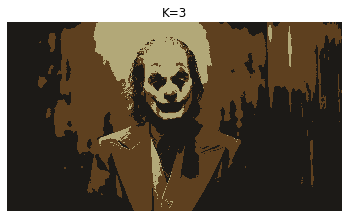

In [7]:
for i in range(9,1,-2):
    k_means=K_Means(i)
    color_swatches,seg_img=segmented_image(k_means)
    drawImage(color_swatches,"K={}".format(i))
    drawImage(seg_img,"K={}".format(i))
    cv2.imwrite('./Segmented_Images/joker(k={}).jpg'.format(i),cv2.cvtColor(seg_img,cv2.COLOR_RGB2BGR))